# <font color='#42AAFF'>Содержание</font><a id='toc0_'></a>    
1. [<font color='#42AAFF'>Введение</font>](#toc1_)    
2. [<font color='#42AAFF'>Обзор данных</font>](#toc2_)    
2.1. [<font color='#42AAFF'>Средняя продолжительность жизни</font>](#toc2_1_)    
2.2. [<font color='#42AAFF'>Средняя интенсивность риска</font>](#toc2_2_)    
2.3. [<font color='#42AAFF'>Оценка функций риска Нельсона-Аалена</font>](#toc2_3_)    
2.4. [<font color='#42AAFF'>Оценка функций выживания Каплана-Майера</font>](#toc2_4_)    
2.5. [<font color='#42AAFF'>Интервальные оценки медианной продолжительности жизни</font>](#toc2_5_)    
2.6. [<font color='#42AAFF'>Влияние факторов на выживаемость</font>](#toc2_6_)    
2.7. [<font color='#42AAFF'>Выводы</font>](#toc2_7_)    
3. [<font color='#42AAFF'>Проверка гипотез</font>](#toc3_)    
3.1. [<font color='#42AAFF'>Теория логрангового теста</font>](#toc3_1_)    
3.2. [<font color='#42AAFF'>Вариации логрангового теста с другими взвешивающими функциями</font>](#toc3_2_)    
3.3. [<font color='#42AAFF'>Таблица для расчёта логрангового теста</font>](#toc3_3_)    
3.4. [<font color='#42AAFF'>Гипотеза о равенстве функций выживания групп "лечения" и "плацебо"</font>](#toc3_4_)    
3.5. [<font color='#42AAFF'>Выводы</font>](#toc3_5_)    
4. [<font color='#42AAFF'>Исследование влияния факторов с помощью простейшей модели Кокса</font>](#toc4_)    
4.1. [<font color='#42AAFF'>Краткая теоретическая справка</font>](#toc4_1_)    
4.2. [<font color='#42AAFF'>Проверка предположения о пропорциональности рисков</font>](#toc4_2_)    
4.2.1. [<font color='#42AAFF'>Сравнение лог-лог функций выживания</font>](#toc4_2_1_)    
4.2.2. [<font color='#42AAFF'>Сравнение ожидаемых и наблюдаемых функций выживания</font>](#toc4_2_2_)    
4.2.3. [<font color='#42AAFF'>Тестирование согласия модели</font>](#toc4_2_3_)    
4.3. [<font color='#42AAFF'>Оценка влияния факторов</font>](#toc4_3_)    
4.3.1. [<font color='#42AAFF'>Фактор Rx</font>](#toc4_3_1_)    
4.3.2. [<font color='#42AAFF'>Фактор Rx и logWBC</font>](#toc4_3_2_)    
4.3.3. [<font color='#42AAFF'>Факторы Rx, logWBC и их взаимодействие</font>](#toc4_3_3_)    
4.4. [<font color='#42AAFF'>Выводы</font>](#toc4_4_)    
5. [<font color='#42AAFF'>Стратифицированная модель Кокса</font>](#toc5_)    
5.1. [<font color='#42AAFF'>Краткая теоретическая справка</font>](#toc5_1_)    
5.2. [<font color='#42AAFF'>Модель без учета взаимодействия</font>](#toc5_2_)    
5.3. [<font color='#42AAFF'>Модель с учетом взаимодействия</font>](#toc5_3_)    
5.4. [<font color='#42AAFF'>Иллюстрация основополагающих приближений моделей</font>](#toc5_4_)    
5.5. [<font color='#42AAFF'>Выводы</font>](#toc5_5_)    
6. [<font color='#42AAFF'>Выводы</font>](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[<font color='#42AAFF'>Введение</font>](#toc0_)

В данном проекте проведём исследовательский анализ выживаемости пациентов по широко известному датасету влияния лечения на пациентов с острым лейкозом (Freireich et al. Blood 21(1963): 699-716). При анализе будем применять инструменты описательной статистики, тестировать гипотезы, исследовать влияние факторов на выживаемость с помощью полупараметрической модели Кокса.

**Цели**
1. Выяснить является ли эффект лечения статистически значимым.
2. Выявить факторы, влияющие на выживаемость.
3. Оценить масштаб влияния факторов на выживаемость с помощью модели Кокса.

**Описание данных**

Данные представлены в виде таблиц для 2х групп "лечение" и "плацебо" со следующими столбцами:
1. time - продолжительность жизни, месяцев
2. logWBC - количество белых кровяных телец
3. sex - пол
4. status - статус лечения (0 - цензурирован, 1 - рецидив)

# 2. <a id='toc2_'></a>[<font color='#42AAFF'>Обзор данных</font>](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
import scipy as sc
import lifelines as lf
from scipy.stats import chi2
from lifelines import KaplanMeierFitter, NelsonAalenFitter,CoxPHFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.datasets import load_leukemia
from lifelines.utils import median_survival_times

In [2]:
lf.__version__

'0.27.4'

In [3]:
data = load_leukemia()

In [4]:
data = data.astype({
                    'status':'bool'                    
                    })
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       42 non-null     int64  
 1   status  42 non-null     bool   
 2   sex     42 non-null     int64  
 3   logWBC  42 non-null     float64
 4   Rx      42 non-null     int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 1.5 KB


In [5]:
data.head(10)

,t,status,sex,logWBC,Rx
0,35,False,1,1.45,0
1,34,False,1,1.47,0
2,32,False,1,2.20,0
3,32,False,1,2.53,0
4,25,False,1,1.78,0
5,23,True,1,2.57,0
6,22,True,1,2.32,0
7,20,False,1,2.01,0
8,19,False,0,2.05,0
9,17,False,0,2.16,0


In [6]:
df_agg = data.groupby('Rx')['status'].agg(['sum',lambda x: x.count() - x.sum(),'count'])
df_agg.columns=['# failed', '# censored','total']
df_agg.applymap('{:.0f}'.format)

,# failed,# censored,total
Rx,,,
0,9,12,21
1,21,0,21


Как видно из таблицы исходные данные частично цензурированы, причем в группе "плацебо" цензурированных данных нет, а в группе "лечение" - более половины выборки цензурированы.

## 2.1. <a id='toc2_1_'></a>[<font color='#42AAFF'>Средняя продолжительность жизни</font>](#toc0_)

Среднее время выживания определяется по формуле:

$\bar{T}$ = $\frac{\sum_{i=1}^{n}t_i}{n}$

Для цензурированных данных $\bar{T}$ недооценивает истинное среднее время жизни, так как при расчете цензурированные данные считаются нецензурированными, тем не менее в данном случае такая оценка позволяет увидеть эффект лечения по сравнению с плацебо.

In [7]:
data.groupby('Rx').agg({'t':'mean'}).applymap('{:.1f}'.format)

,t
Rx,
0,17.1
1,8.7


## 2.2. <a id='toc2_2_'></a>[<font color='#42AAFF'>Средняя интенсивность риска</font>](#toc0_)

Средняя интенсивность риска определяется следующим образом:

$\bar{h}$ = $\frac{number-of-failures}{\sum_{i=1}^{n}t_i}$

Согласно результатам $\bar{h}$ больше для группы "плацебо", таким образом вероятность выживания в группе "лечение" выше.

In [8]:
df_agg = data.groupby('Rx').agg({'status':'sum','t':['mean','sum'],}).applymap('{:.1f}'.format).reset_index()
df_agg = df_agg.astype({
                    ('status','sum'):'float',
                    ('t','sum'):'float'              
                    })
df_agg['aver_hazard_rate'] = (df_agg[('status','sum')]/df_agg[('t','sum')]).apply('{:.3f}'.format)
df_agg

Rx status     t        aver_hazard_rate
        sum  mean    sum                 
0  0    9.0  17.1  359.0            0.025
1  1   21.0   8.7  182.0            0.115

## 2.3. <a id='toc2_3_'></a>[<font color='#42AAFF'>Оценка функций риска Нельсона-Аалена</font>](#toc0_)

Эмпирическая оценка функции риска Нельсона-Аалена определена следующим образом:

$\hat{H}(t)$ =$\sum\limits_{t_i<t}^{} \frac{d_i}{n_i}$, где

$d_i$ - количество рецидивов в момент времени $t$,\
$n_i$ - количество живых пациентов в момент времени $t$

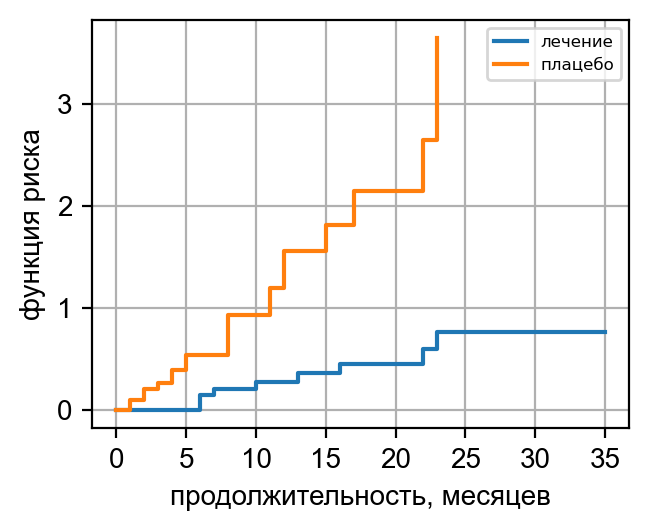

In [9]:
cm = 1/2.54
fig, axs = plt.subplots(figsize=(8.5*cm,7*cm),dpi=200)
cmap = plt.cm.get_cmap('tab10')

naf0 = NelsonAalenFitter()
naf0.fit(data.query('Rx==0')['t'],data.query('Rx==0')['status'])
hf0 = naf0.cumulative_hazard_.reset_index()
x0 = hf0.iloc[:,0].values
y0 = hf0.iloc[:,1].values

naf1 = NelsonAalenFitter()
naf1.fit(data.query('Rx==1')['t'],data.query('Rx==1')['status'])
hf1 = naf1.cumulative_hazard_.reset_index()
x1 = hf1.iloc[:,0].values
y1 = hf1.iloc[:,1].values

plt.step(x0, y0, where="post",label='лечение')
plt.step(x1, y1, where="post",label='плацебо')
axs.grid(True)
#axs.set_ylim(0,1)
axs.set_xlabel('продолжительность, месяцев')
axs.set_ylabel('функция риска')
plt.xticks(np.arange(0, 36, 5))
axs.legend(fontsize=6)
for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
             axs.get_xticklabels() + axs.get_yticklabels()):    
    item.set_font('Arial')
    item.set_fontsize(10)
fig.tight_layout()
plt.show() 

## 2.4. <a id='toc2_4_'></a>[<font color='#42AAFF'>Оценка функций выживания Каплана-Майера</font>](#toc0_)

Эмпирическая оценка функции выживания Каплана-Майера определена следующим образом:

$\hat{S}(t)$ =$\prod\limits_{t_i<t}^{} \frac{n_i-d_i}{n_i}$, где

$d_i$ - количество рецидивов в момент времени $t$,\
$n_i$ - количество живых пациентов в момент времени $t$

В более простом варианте (без таблиц выживаемости и доверительных интервалов функций выживания) оценки функций выживаемости имеют следующий вид:

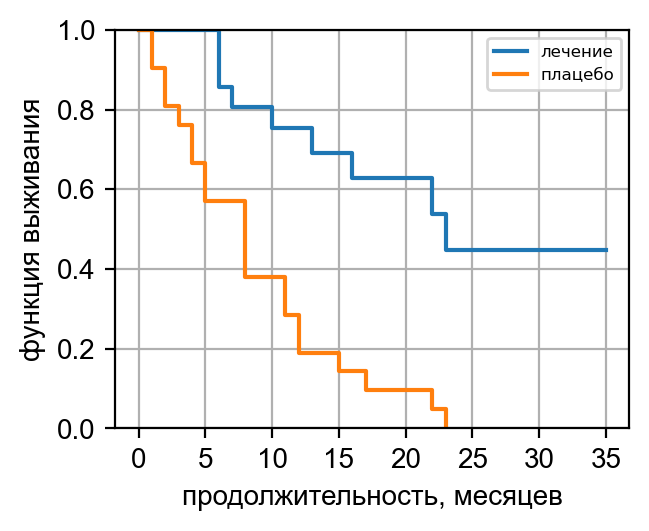

In [10]:
cm = 1/2.54
fig, axs = plt.subplots(figsize=(8.5*cm,7*cm),dpi=200)
cmap = plt.cm.get_cmap('tab10')

kmf0 = KaplanMeierFitter()
kmf0.fit(data.query('Rx==0')['t'],data.query('Rx==0')['status'])
sf0 = kmf0.survival_function_.reset_index()
x0 = sf0.iloc[:,0].values
y0 = sf0.iloc[:,1].values



kmf1 = KaplanMeierFitter()
kmf1.fit(data.query('Rx==1')['t'],data.query('Rx==1')['status'])
sf1 = kmf1.survival_function_.reset_index()
x1 = sf1.iloc[:,0].values
y1 = sf1.iloc[:,1].values


plt.step(x0, y0, where="post",label='лечение')
plt.step(x1, y1, where="post",label='плацебо')
axs.grid(True)
axs.set_ylim(0,1)
axs.set_xlabel('продолжительность, месяцев')
axs.set_ylabel('функция выживания')
plt.xticks(np.arange(0, 36, 5))
axs.legend(fontsize=6)
for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
             axs.get_xticklabels() + axs.get_yticklabels()):    
    item.set_font('Arial')
    item.set_fontsize(10)
fig.tight_layout()
plt.show() 

Построим функции выживания с таблицами выживаемости:

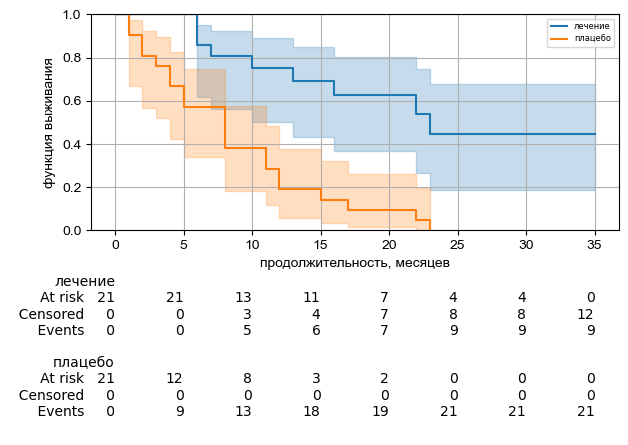

In [11]:
cm = 1/2.54
fig, axs = plt.subplots()
cmap = plt.cm.get_cmap('tab10')


kmf0 = KaplanMeierFitter()
f0 = kmf0.fit(data.query('Rx==0')['t'],data.query('Rx==0')['status'], label="лечение")
kmf0.plot_survival_function(ax=axs)


kmf1 = KaplanMeierFitter()
f1 = kmf1.fit(data.query('Rx==1')['t'],data.query('Rx==1')['status'], label="плацебо")
kmf1.plot_survival_function(ax=axs)

add_at_risk_counts(f0,f1,ax=axs,fig=fig)

axs.grid(True)
axs.set_ylim(0,1)
axs.set_xlabel('продолжительность, месяцев')
axs.set_ylabel('функция выживания')
#plt.xticks(np.arange(0, 36, 5))
axs.legend(fontsize=6)
for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
             axs.get_xticklabels() + axs.get_yticklabels()):    
    item.set_font('Arial')
    item.set_fontsize(10)


plt.tight_layout()

## 2.5. <a id='toc2_5_'></a>[<font color='#42AAFF'>Интервальные оценки медианной продолжительности жизни</font>](#toc0_)

Brookmeyer и Crowley (1982) предложили простой способ оценки доверительного интервала медианной продолжительности жизни пользуясь известным фактом, что распределение стандартизированной случайной величины асимптотически стремится к  распределениею $\chi^2$:

$\frac{(\hat{S}_{KM}(M)-0.5)^2}{\hat{Var}(\hat{S}_{KM}(t))} \sim \chi^2_1$,

где

$M$ - истинная медианная продолжительность жизни, т.е. $\hat{S}_{KM}(M)=0.5$

$\hat{S}_{KM}(M)$ - оценка вероятности выживания (из оценки Каплана-Майера) в момент времени соответствующей медианной продолжительности жизни

$\hat{Var}(\hat{S}_{KM}(t))$ - дисперсия

Дисперсия оценивается по формуле Гринвуда:

$\hat{Var}[\hat{S}_{KM}(t)]$ = $(\hat{S}_{KM}(t))^2\sum\limits_{f:t_{(f)\le{}t}}^{}[\frac{m_f}{n_f(n_f-m_f)}]$, где

$t_{(f)}$ - время рецидива fго порядка\
$m_f$ - число рецидивов в момент $t_{(f)}$ \
$n_f$ - число живых в момент $t_{(f)}$ 

Тогда 95% интервал медианной продолжительности жизни оценивается из неравенства:


$(\hat{S}_{KM}(t)-0.5)^2$ < $3.84\hat{Var}[\hat{S}_{KM}(t)]$, 

In [12]:
cols = ['median','95% lower','95% upper']
index = ['лечение','плацебо']
med0 = kmf0.median_survival_time_
med1 = kmf1.median_survival_time_
ci0 = median_survival_times(kmf0.confidence_interval_).values
ci1 = median_survival_times(kmf1.confidence_interval_).values
pivot_data=[[med0, ci0[0,0], ci0[0,1]], [med1, ci1[0,0], ci1[0,1]]]
df_pivot = pd.DataFrame(index=index, columns=cols,data=pivot_data)  
df_pivot

,median,95% lower,95% upper
лечение,23.0,13.0,inf
плацебо,8.0,4.0,11.0


## 2.6. <a id='toc2_6_'></a>[<font color='#42AAFF'>Влияние факторов на выживаемость</font>](#toc0_)

Кроме собственно лечения на продолжительность жизни могут влиять факторы sex и logWBC. Первые 2 фактора бинарные, а последний непрерывный. Для удобства оценки влияния непрерывного фактора разобьем выборку на 3 группы по его значениям:

In [13]:
data['logWBC_group'] = data['logWBC'].apply(
    lambda x: 0 if x<=2.3 else 1 if x<=3 else 2)

Построим оценки Каплана-Майера для каждого из факторов:

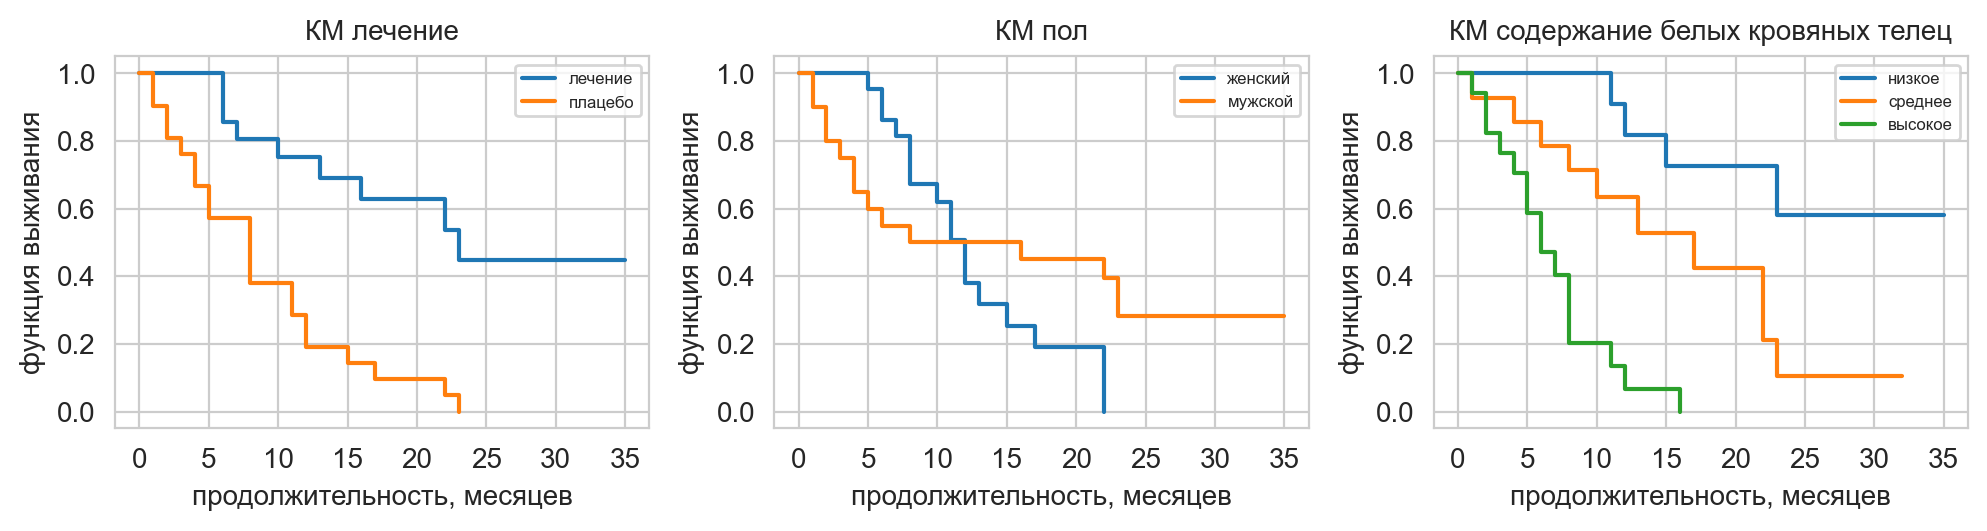

In [14]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols = 3, figsize = (8.5*3*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
par = ['Rx','sex','logWBC_group']
title = ['КМ лечение','КМ пол','КМ содержание белых кровяных телец']
val = [[0,1],[0,1],[0,1,2]]
labl = [['лечение','плацебо'],['женский','мужской'],['низкое','среднее','высокое']]

kmf = KaplanMeierFitter()

for j in range(0,3):
    for v in range(0,len(val[j])):            
        kmf.fit(
            data[data[par[j]]==val[j][v]]['t'], 
            data[data[par[j]]==val[j][v]]['status'],
            label = labl[j][v],
            alpha=0.05)
            
        s = kmf.survival_function_.reset_index()
        x = s.iloc[:,0].values
        y = s.iloc[:,1].values
        axs[j].step(x, y, where="post",label = labl[j][v])


for j in range(0,3):    
    axs[j].grid(True)
    axs[j].set_xlabel('продолжительность, месяцев')
    axs[j].set_ylabel('функция выживания')
    axs[j].set_title(title[j])    
    axs[j].set_xticks(np.arange(0, 36, 5))
    axs[j].legend(fontsize=6)
    for item in ([axs[j].title, axs[j].xaxis.label, axs[j].yaxis.label] +
                axs[j].get_xticklabels() + axs[j].get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show()    

На основании полученных результатов можно предполагать, что:

1. Лечение увеличивает шанс вылечиться.
2. Чем ниже содержание белых кровяных телец, тем больше шансов выздороветь.
3. Влияние пола неоднозначно, на ранних этапах больше шансов вылечиться у женщин, а на поздних у мужчин.

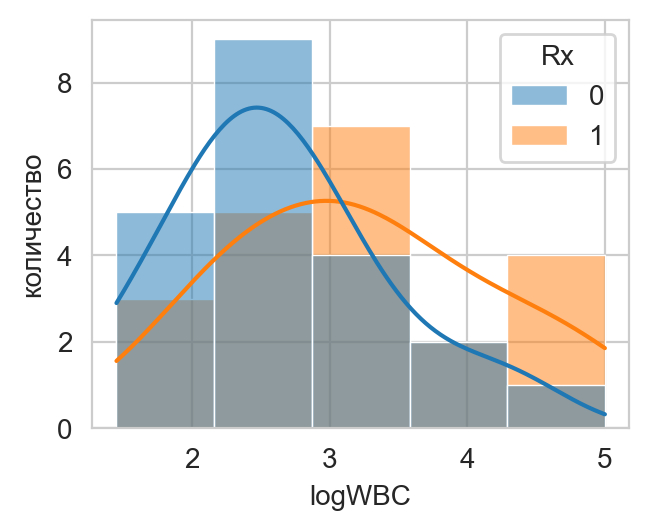

In [15]:
cm = 1/2.54
fig, axs = plt.subplots( figsize = (8.5*cm,7*cm),dpi = 200)
sns.set_style("whitegrid")
cmap = plt.cm.get_cmap('tab10')
axs.set(
        xlabel='logWBC'
        ) 
axs = sns.histplot(
    data = data,
    x='logWBC',
    hue = 'Rx',
    bins = 5, 
    kde=True,
    linewidth=0.5      
    #kde=True,                  
    )
axs.grid(True)
axs.set_ylabel('количество')
       
for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
    axs.get_xticklabels() + axs.get_yticklabels()):
    item.set_font('Arial')
    item.set_fontsize(10)
   

fig.tight_layout()  
plt.show() 

Известно, что содержание белых кровяных телец logWBC является хорошим индикатором: чем меньше logWBC, тем больше шансов на выздоровление. Но распределения logWBC в каждой из групп лечение/плацебо отличаются друг от друга и средние значения в группе лечение явно ниже, чем в плацебо. Таким образом, при анализе эффективности лечения необходимо учитывать, что logWBC может быть конфаундером - т.е. влиять не только на продолжительность жизни напрямую, но и через фактор лечения.

## 2.7. <a id='toc2_7_'></a>[<font color='#42AAFF'>Выводы</font>](#toc0_)

1. Результаты сравнения различных характеристик выживаемости в группах "плацебо" и "лечение" с помощью инструментов описательной статистики позволяют предполагать, что выживаемость в группах отличается:

    1.1. Средняя продолжительность жизни составляет 8.7 и 17.1 месяцев соответственно.\
    1.2. Средняя интенсивность риска составляет 0.115 и 0.025 соответственно.\
    1.3. Эмпирические оценки функий риска (оценка Нельсона-Аалена) и функций выживания (оценка Каплана-Майера) существенно отличаются для групп с учетом 95% доверительных интервалов.\
    1.4. Медианные оценки продолжительности жизни составляют 8.0 и 23.0 недели соответственно.\
    1.5. Интервальные оценки продолжительности жизни при уровне значимости 0.05 имеют вид (4.0, 11.0) и (13.0, inf) соответственно и не пересекаются.
    
2. Сравнение оценок функций выживания Каплана-Майера для разных диапазонов logWBC позволяет предполагать, что чем ниже содержание белых кровяных телец, тем больше шансов выздороветь.
3. Сравнение оценок функций выживания Каплана-Майера для пола неоднозначно, на ранних этапах больше шансов вылечиться у женщин, а на поздних у мужчин.

# 3. <a id='toc3_'></a>[<font color='#42AAFF'>Проверка гипотез</font>](#toc0_)

## 3.1. <a id='toc3_1_'></a>[<font color='#42AAFF'>Теория логрангового теста</font>](#toc0_)

При выполнении нулевой гипотезы в каждый момент времени $t_j$, в которое происходит событие (рецидив), вероятность реализации $m_{1j}$ событий из $n_{1j}$ в группе 1 при общем числе событий $m_j$ и объектов $n_j$ имеет следующий вид:

$P(\xi{}_j=m_{1j})$ = $\frac{C_{m_j}^{m_{1j}}C_{n_j-m_j}^{n_j-n_{1j}}}{C_{n_j}^{n_{1j}}}$

Функция распределения такой случайной величины имеет гипергеометрическое распределение, для которого известны матожидание:

$e_{1j} = \frac{n_{1j}}{n_{1j} + n_{2j}}(m_{1j} + m_{2j})$

$e_{2j} = \frac{n_{2j}}{n_{1j} + n_{2j}}(m_{1j} + m_{2j})$, где 

$m_{ij}$ - число рецидивов в i группе в момент времени $t_j$

$n_{ij}$ - число живых в i группе в момент времени $t_j$

и дисперсия:

$D(\xi{}_j)$ = $\frac{n_{1j}{n_{2j}}(m_{1j}+m_{2j})(n_{1j}+n_{2j}-m_{1j}-m_{2j})}{(n_{1j}+n_{2j})^2(n_{1j}+n_{2j}-1)}$


Согласно ЦПТ Линдеберга матожидание и дисперсия суммы независимых случайных величин $\xi{} = \sum\limits_{j=1}^{k}\xi{}_j$ с конечными матожиданиями и дисперсиями равна сумме матожиданий и дисперсий $\xi{}_j$ соответственно:

$E\xi{}$ = $\sum\limits_{j=1}^{k}E\xi{}_j$ = $\sum\limits_{j=1}^{k}\mu{}_j$

$D\xi{}$ = $\sum\limits_{j=1}^{k}D\xi{}_j$ = $\sum\limits_{j=1}^{k}\sigma{}_j^2$

и

$\frac{\xi{}-E\xi{}}{\sqrt{D\xi{}_f}} \xrightarrow{k\rightarrow{}\infty} N(0,1)$



Тогда квадрат такой случайной величины $(\frac{\xi{}-E\xi{}}{\sqrt{D\xi{}_f}})^2$ имеет распределение  $\chi{}^2_1$ с 1 одной степенью свободы.

Именно такая случайная величина применяется логранговым тестом в качестве критериальной статистики, которую с учетом известных моментов можно заисать в виде:

Log-rank statistic = $\sum\limits_{j=1}^{k}\frac{(m_{if}-e_{if})^2}{D\xi{}_j}$, где

$D\xi{}_j$ = $\frac{n_{1j}{n_{2j}}(m_{1j}+m_{2j})(n_{1j}+n_{2j}-m_{1j}-m_{2j})}{(n_{1j}+n_{2j})^2(n_{1j}+n_{2j}-1)}$

$i=1,2$ - индекс группы

## 3.2. <a id='toc3_2_'></a>[<font color='#42AAFF'>Вариации логрангового теста с другими взвешивающими функциями</font>](#toc0_)

В качестве альтернативы логранговому тесту могут применяться его вариации с различными весовыми функциями, переносящими акцент на тот или иной участок функции выживания. К таким тестам относятся тесты Вилкоксона, Тароне-Варе, Пето и Флемингтона-Харрингтона.

В обобщенном случае тестовая статистика имеет следующий вид:

Test statistic = $\frac{\sum\limits_{j=1}^{n} (w(t_j)(m_{if}-e_{if}))^2}{\sum\limits_{j} w(t_j)D\xi{}_j}$

$i$ = 1,2

$j$ - номер момента времени рецидива

$w(t_j)$ - значение веса в j момент времени рецидива

| Test statistics | $\bm{w(t_j)}$|
| --- | --- |
| Log-rank | 1.0 |
| Wilcoxon | $n_j$ |
| Tarone-Ware | $\sqrt{(n_j)}$ |
| Peto | $\hat{S}(t_j)$ |
|Flemington-Harrington |$\hat{S}(t_{j-1})^p[1 - \hat{S}(t_{j-1})]^q$ |


Тесты Вилкоксона, Тарон-Варе, Пето в большей степени учитывают раннюю смертность, тест Флемингтона-Харрингтона более универсален и в зависимости от значений параметров p и q может в разной степени учитывать раннюю/позднюю смертность.

## 3.3. <a id='toc3_3_'></a>[<font color='#42AAFF'>Таблица для расчёта логрангового теста</font>](#toc0_)

Подготовим таблицу с необходимыми для расчёта статистики логрангового теста параметрами:

In [16]:
df_logrank = pd.DataFrame(columns=['t','m1','m2','n1','n2','e1','e2','oe1','oe2'])
df_logrank['t'] = data.query('status==True')['t'].sort_values().unique()
df_logrank['n1'] = df_logrank['t'].apply(lambda x: len(data.query('Rx==0 & t>=@x')))
df_logrank['n2'] = df_logrank['t'].apply(lambda x: len(data.query('Rx==1 & t>=@x')))
df_logrank['m1'] = df_logrank['t'].apply(lambda x: len(data.query('Rx==0 & t==@x & status==True')))
df_logrank['m2'] = df_logrank['t'].apply(lambda x: len(data.query('Rx==1 & t==@x & status==True')))
df_logrank['e1'] = df_logrank.apply(lambda x: x['n1'] / (x['n1'] + x['n2']) * (x['m1'] + x['m2']), axis=1).round(3)
df_logrank['e2'] = df_logrank.apply(lambda x: x['n2'] / (x['n1'] + x['n2']) * (x['m1'] + x['m2']), axis=1).round(3)
df_logrank['oe1'] = df_logrank['m1'] - df_logrank['e1']
df_logrank['oe2'] = df_logrank['m2'] - df_logrank['e2']
df_logrank['var'] = df_logrank.apply(lambda x: x['n1']*x['n2']*(x['m1']+x['m2'])*(x['n1']+x['n2']-x['m1']-x['m2'])/(x['n1']+x['n2'])**2/(x['n1']+x['n2']-1),axis=1)

In [17]:
df_logrank

,t,m1,m2,n1,n2,e1,e2,oe1,oe2,var
0,1,0,2,21,21,1.000,1.000,-1.000,1.000,0.487805
1,2,0,2,21,19,1.050,0.950,-1.050,1.050,0.485962
2,3,0,1,21,17,0.553,0.447,-0.553,0.553,0.247230
3,4,0,2,21,16,1.135,0.865,-1.135,1.135,0.477234
4,5,0,2,21,14,1.200,0.800,-1.200,1.200,0.465882
5,6,3,0,21,12,1.909,1.091,1.091,-1.091,0.650826
6,7,1,0,17,12,0.586,0.414,0.414,-0.414,0.242568
7,8,0,4,16,12,2.286,1.714,-2.286,2.286,0.870748
8,10,1,0,15,8,0.652,0.348,0.348,-0.348,0.226843
9,11,0,2,13,8,1.238,0.762,-1.238,1.238,0.448073


## 3.4. <a id='toc3_4_'></a>[<font color='#42AAFF'>Гипотеза о равенстве функций выживания групп "лечения" и "плацебо"</font>](#toc0_)

Проверим нулевую гипотезу о равенстве функций выживания групп "лечения" и "плацебо". Для этого выполним логранговый тест "вручную" и с помощью библиотеки `lifelines`:

In [18]:
df_logrank.agg('sum').round(2)

t      175.00
m1       9.00
m2      21.00
n1     256.00
n2     162.00
e1      19.25
e2      10.75
oe1    -10.25
oe2     10.25
var      6.26
dtype: float64

In [19]:
lr_st = (df_logrank.agg('sum')['oe2']**2/df_logrank.agg('sum')['var']).round(2)
log2p = -np.log2(1-chi2.cdf(lr_st,1)).round(2)
lr_st
print(
    f'Результаты логрангового теста "вручную":\n'
    f'Тестовая статистика: {lr_st:3.2f}\n'    
    f'log2(p-value): {log2p:0.2f}\n'    
    )

Результаты логрангового теста "вручную":
Тестовая статистика: 16.79
log2(p-value): 14.55



In [20]:
results = lf.statistics.logrank_test(
    data.query('Rx==0')['t'], 
    data.query('Rx==1')['t'], 
    event_observed_A = data.query('Rx==0')['status'], 
    event_observed_B = data.query('Rx==1')['status']
    )
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

Отметим, что результаты расчётов "вручную" и используя встроенную функцию `lifelines` полностью совпадают. При уровне значимости 0.05 логранговый тест отверг нулевую гипотезу о равенстве функций выживания групп "плацебо" и "лечение". Таким образом, наблюдаемые отличия функций выживания статистически значмимы.

## 3.5. <a id='toc3_5_'></a>[<font color='#42AAFF'>Выводы</font>](#toc0_)

1. Протестировали влияние фактора лечения на функцию выживания с помощью логрангового теста - влияние значимое при уровне значимости 0.05. 
2. Более сложным тестированием с учетом влияния остальных факторов не занимались, исследуем этот вопрос при анализе моделей Кокса.

# 4. <a id='toc4_'></a>[<font color='#42AAFF'>Исследование влияния факторов с помощью простейшей модели Кокса</font>](#toc0_)

## 4.1. <a id='toc4_1_'></a>[<font color='#42AAFF'>Краткая теоретическая справка</font>](#toc0_)

Основная идея полупараметрической модели пропорционального риска Кокса состоит в предположении, что функцию интенсивности риска можно представить в виде произведения множителя, зависящего от времени, но независящего от других факторов, и множителя, независящего от времени, но зависящего от других факторов, причем последний множитель имеет вид экспоененты от линейной комбинации других факторов:

$h(t)$ = $h_0(t)exp[\sum\limits_{i=1}^{n}\beta{}_ix_i]$, где 

$h_0(t)$ - базовая функция интенсивности риска, которая зависит только от времени,

$x_i$ - значение i-го признака,

$\beta{}_i$ - значение i-го коэффициента регрессии

Тогда для сравнительного анализа 2 групп объектов мы можем пользоваться отношением рисков, независящим от эмпирически определяемой базовой функции интенсивности риска:

$HR(x)$ = $\frac{h_1(t)}{h_2(t)}$ = $exp[\sum\limits_{i=1}^{n}\beta{}_i(x^1_i-x^2_i)]$

Физический  смысл отношения  рисков - на каждом интервале времени пациенты одной группы имеет в $HR$ раз больше шансов остаться в живых, чем пациенты другой группы.

Если к последнему равенству применить логарифмирование, то задача будет сведена к задаче линейной регрессии:

$ln(HR(x))$ = $\sum\limits_{i=1}^{n}\beta{}_i(x^1_i-x^2_i)$ 

## 4.2. <a id='toc4_2_'></a>[<font color='#42AAFF'>Проверка предположения о пропорциональности рисков</font>](#toc0_)

В основе модели Кокса лежит предположение о пропорциональности интенсивности рисков - отношение интесивности рисков не должно зависеть от времени, что является условием применимости модели Кокса и нуждается в проверке.

Проверить выполнение условия пропорциональности рисков можно следующими способами:
1. Визуально по графикам лог-лог функций выживания.
2. Визуально при сравнении оценочных (полученных из модели Кокса) и эмпирических функций выживания. 
3. Тестируя 

### 4.2.1. <a id='toc4_2_1_'></a>[<font color='#42AAFF'>Сравнение лог-лог функций выживания</font>](#toc0_)

Построим графики $-log(-log\hat{S}(t))$ для каждого из признаков: группа (Rx), пол (sex), содержание белых кровяных телец (logWBC_group).

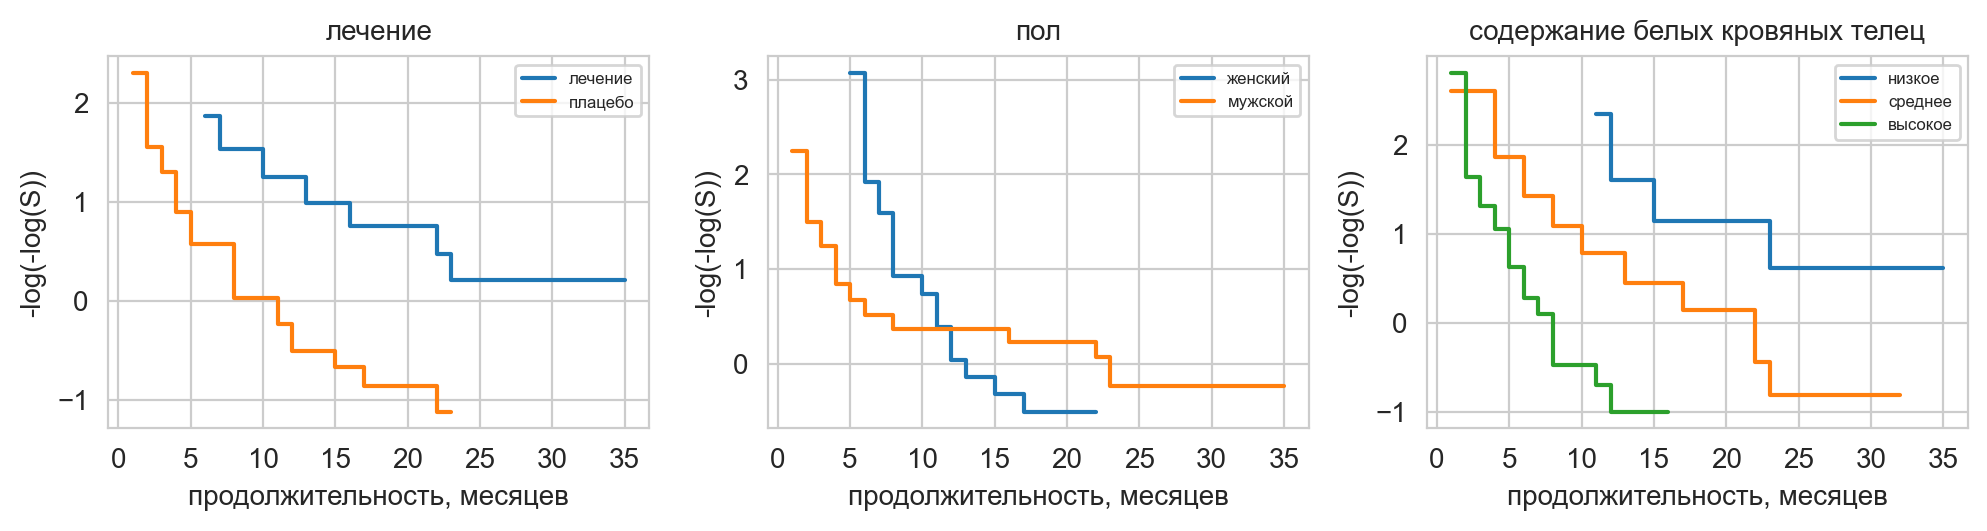

In [21]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols = 3, figsize = (8.5*3*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
par = ['Rx','sex','logWBC_group']
title = ['лечение','пол','содержание белых кровяных телец']
val = [[0,1],[0,1],[0,1,2]]
labl = [['лечение','плацебо'],['женский','мужской'],['низкое','среднее','высокое']]

kmf = KaplanMeierFitter()

for j in range(0,3):
    for v in range(0,len(val[j])):            
        kmf.fit(
            data[data[par[j]]==val[j][v]]['t'], 
            data[data[par[j]]==val[j][v]]['status'],
            label = labl[j][v],
            alpha=0.05)
            
        s = kmf.survival_function_.reset_index()
        x = s.iloc[:,0].values
        y = s.iloc[:,1].values
        z = - np.log(-np.log(y))
        axs[j].step(x, z, where="post",label = labl[j][v])


for j in range(0,3):    
    axs[j].grid(True)
    axs[j].set_xlabel('продолжительность, месяцев')
    axs[j].set_ylabel('-log(-log(S))')
    axs[j].set_title(title[j])    
    axs[j].set_xticks(np.arange(0, 36, 5))
    axs[j].legend(fontsize=6)
    for item in ([axs[j].title, axs[j].xaxis.label, axs[j].yaxis.label] +
                axs[j].get_xticklabels() + axs[j].get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show()     

На графиках видно, что графики для факторов группа и содержание белых кровяных телец кривые условно параллельны и не пересекаются, т.е. условие пропорциональости выполняется. Для фактора пол кривые явно пересекаются, т.е. для этого фактора условие пропорциональности не выполняется.

### 4.2.2. <a id='toc4_2_2_'></a>[<font color='#42AAFF'>Сравнение ожидаемых и наблюдаемых функций выживания</font>](#toc0_)

Для каждого из факторов построим график наблюдаемых и ожидаемых функций выживания:
1. Наблюдаемые функции выживания получены в результате оценок Каплана-Майера для выборок с общим значением рассматриваемого признака.
2. Ожидаемые функции выживания получены в результате обучения модели Кокса для рассматриваемого признака.

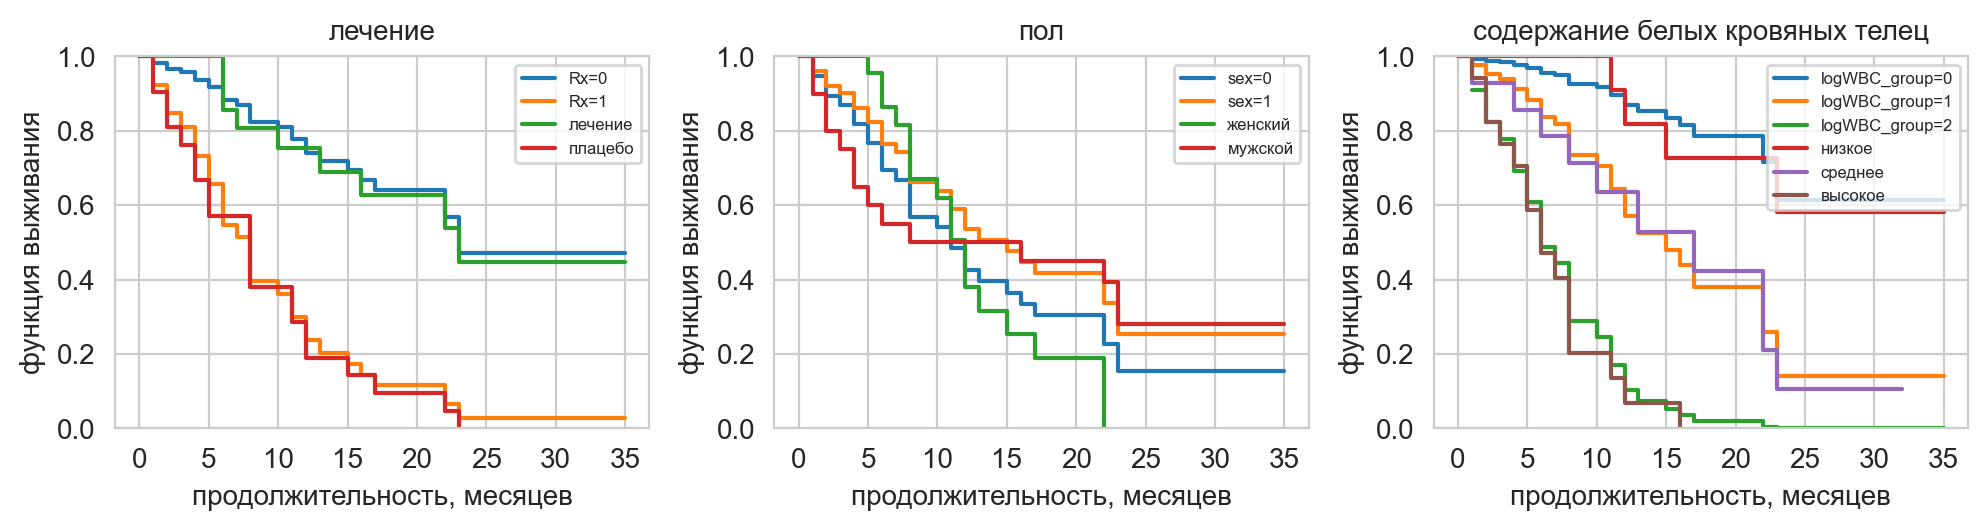

In [22]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols = 3, figsize = (8.5*3*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
par = ['Rx','sex','logWBC_group']
title = ['лечение','пол','содержание белых кровяных телец']
val = [[0,1],[0,1],[0,1,2]]
labl = [['лечение','плацебо'],['женский','мужской'],['низкое','среднее','высокое']]

cph = CoxPHFitter()
kmf = KaplanMeierFitter()

for j in range(0,3):
    cph.fit(
        data[['t','status',par[j]]], 
        duration_col = 't', 
        event_col = 'status')
    cph.plot_partial_effects_on_outcome(par[j],val[j],plot_baseline=False,ax=axs[j])            

    for v in range(0,len(val[j])):            
        kmf.fit(
            data[data[par[j]]==val[j][v]]['t'], 
            data[data[par[j]]==val[j][v]]['status'],
            label = labl[j][v],
            alpha=0.05)
            
        s = kmf.survival_function_.reset_index()
        x = s.iloc[:,0].values
        y = s.iloc[:,1].values
        axs[j].step(x, y, where="post",label = labl[j][v])

for j in range(0,3):    
    axs[j].grid(True)
    axs[j].set_ylim(0,1)
    axs[j].set_xlabel('продолжительность, месяцев')
    axs[j].set_ylabel('функция выживания')
    axs[j].set_title(title[j])    
    axs[j].set_xticks(np.arange(0, 36, 5))
    axs[j].legend(fontsize=6)

    for item in ([axs[j].title, axs[j].xaxis.label, axs[j].yaxis.label] +
                axs[j].get_xticklabels() + axs[j].get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show() 

Соответствующие ожидаемые и наблюдаемые функции выживания близки для признаков группа и содержание белых кровяных телец, следовательно, для этих признаков предположение о пропорциональности интенсивности рисков выполняется. Для признака пол наблюдаемые и ожидаемые функции выживания существенно отличаются, в том числе тем, что первые явно пересекаются, а вторые - нет, следовательно для этого признака предположение о пропорциональности не выполняется.

### 4.2.3. <a id='toc4_2_3_'></a>[<font color='#42AAFF'>Тестирование согласия модели</font>](#toc0_)

Для 2х предыдущих визуальных способов проверки выполнения условия пропорциональности интенсивности рисков характерен некоторый субьективизм, в данном случае выполняется статистическое тестирование, дающие однозначный ответ. Тем не менее данный способ рекоммендуется применять в качестве дополнения к одному из 2х предыдущих, так как в некоторых случаях визуальные способы лучше позволяют обнаружить нарушение условия пропорциональности рисков.

Тестирование выполняется следующим образом:
1. Для каждого признака и каждого элемента выборки с событием определяют остаток Schoenfeld для Кокс модели как разность между значением признака для данного элемента и средневзвешенным значением признака среди элементов, для которых событие еще не наступило в момент события данного элемента.

2. Для каждого признака создается ранжирующая порядок событий переменная. Для самого раннего события значение переменной равно 1, следующее - 2 и т.д.

3. Тестируется корреляция между остатками Schoenfeld и ранжирующей переменной. Если коэффициент корреляции статистически значимо отличается от 0, то нулевая гипотеза отвергается и условие пропорциональности рисков нарушается (есть связь со временем). 

Выполним такое тестирование для модели, учитывающей все признаки:

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
         test_name = proportional_hazard_test

---
                   test_statistic    p  -log2(p)
Rx           km              0.18 0.67      0.58
             rank            0.28 0.60      0.74
logWBC_group km              0.08 0.78      0.36
             rank            0.05 0.82      0.29
sex          km              6.49 0.01      6.53
             rank            7.17 0.01      7.08



1. Variable 'sex' failed the non-proportional test: p-value is 0.0074.

   Advice: with so few unique values (only 2), you can include `strata=['sex', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0074)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0108)'>]]

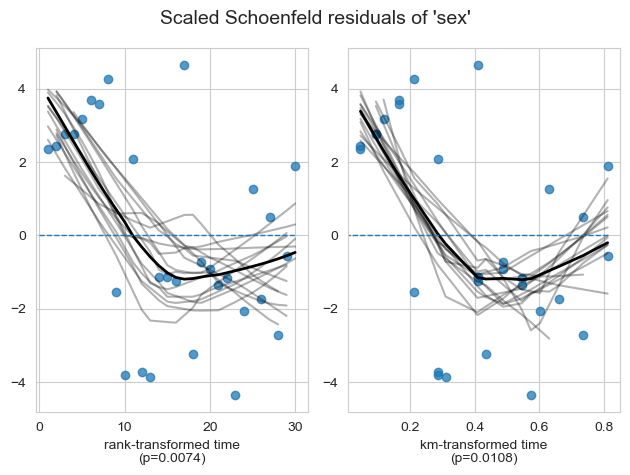

In [23]:
cph = CoxPHFitter()
cph.fit(data[['t','status','Rx','sex','logWBC_group']], duration_col = 't', event_col = 'status')
sns.set_style("whitegrid")
cph.check_assumptions(data[['t','status','Rx','sex','logWBC_group']],p_value_threshold=0.05, show_plots=True)

Согласно полученным результатам при уровне значимости 0.05 нулевая гипотеза отклонена только для признака пол, для остальных признаков условие пропорциональности рисков выполняется.

## 4.3. <a id='toc4_3_'></a>[<font color='#42AAFF'>Оценка влияния факторов</font>](#toc0_)

Обычно перед исследователем стоит одна или несколько целей из следующих:

1. Определить признаки, которые статистически значимы и незначимы.
2. Оценить масштабы влияния признаков. Построить точечные оценки целевого параметра для некоторых наборов значений признаков.
3. Выполнить интервальную оценку влияния признаков.

Всех эти цели можно достичь, применяя полупараметрическую модель Кокса.

Для построения модели, хорошо описывающей экспериментальные результаты, необходимо учесть все значимые признаки. Судить о значимости признака можно по результатам Z-тестирования, также о значимости и важности признака свидетельствует улучшение качества модели при добавлении в модель данного признака. Для оценки изменения качества модели можно использовать статистику отношения правдоподобия и критерий максимального правдоподобия, можно использовать метрики Partial AIC, Concordance.

В предыдущем разделе мы выяснили, что для признака пол не выполняется условие применимости классической модели Кокса, поэтому на данном этапе будем рассматривать оставшиеся 2 признака и их комбинации.

Рассмотрим следующие 3 модели:
1. Признаки - только Rx.
2. Признаки - Rx и logWBC.
3. Признаки - Rx, logWBC и взаимодействие Rx и logWBC - Rx*logWBC.

### 4.3.1. <a id='toc4_3_1_'></a>[<font color='#42AAFF'>Фактор Rx</font>](#toc0_)

In [24]:
cph1 = CoxPHFitter()
cph1.fit(data[['t','status','Rx']], duration_col = 't', event_col = 'status')
cph1.print_summary() 

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-26 14:09:23 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Rx          1.57       4.82       0.41             0.76             2.38                 2.15                10.81

            cmp to    z      p   -log2(p)
covariate                                
Rx            0.00 3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

In [25]:
print(
    f'Расчёт -log2(p-value) Z-теста для коэффициента Rx:\n'
    f'Тестовая статистика: {abs(cph1.params_["Rx"]/cph1.standard_errors_["Rx"]):3.2f}\n'    
    f'log2(p-value): {-np.log2(sc.stats.norm.sf(abs(cph1.params_["Rx"]/cph1.standard_errors_["Rx"]))*2).round(2)}\n'    
    )

Расчёт -log2(p-value) Z-теста для коэффициента Rx:
Тестовая статистика: 3.81
log2(p-value): 12.83



Рассмотрим результаты модели, учитывающей фактор лечения:
1. Z-тест при уровне значимости больше 0.005 отклонил нулевую гипотезу, т.е. коэффициент при Rx статистически значимо отличен от 0.
2. Качество модели не самое высокое, судя по метрике Concordance (или c-index) равной 0.69, максимально возможное значение - 1, 0.5 - соответствует случайному предсказанию.
3. Модель можно представить аналитически в виде $h(t)$ = $h_0(t)exp[\beta{}*(Rx-\bar{Rx})]$ = $h_0(t)exp[1.57*(Rx-0.5)]$
4. Отношение интенсивностей рисков равно $\frac{h_1(t)}{h_0(t)}$ = $\frac{exp[1.57*(1-0.5)]}{exp[1.57*(0-0.5)]}$ = $exp[1.57]$ = $4.82$ означает, что относительная вероятность рецидива в 4.82 раза выше у пациентов группы плацебо по сравнению с пациентами группы лечение.

### 4.3.2. <a id='toc4_3_2_'></a>[<font color='#42AAFF'>Фактор Rx и logWBC</font>](#toc0_)

In [26]:
cph2 = CoxPHFitter()
cph2.fit(data[['t','status','Rx','logWBC']], duration_col = 't', event_col = 'status')
cph2.print_summary() 

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -69.83
         time fit was run = 2023-03-26 14:09:23 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Rx          1.39       4.00       0.42             0.55             2.22                 1.74                 9.20
logWBC      1.69       5.42       0.34             1.03             2.35                 2.81                10.48

            cmp to    z      p   -log2(p)
covariate                                
Rx            0.00 3.26 <0.005       9.82
logWBC        0.00 5.03 <0.005      20.99
---
Concordance = 0.85
Partial AIC = 143.66
log-likelihood ratio test = 46.71 on 2 df
-log2(p) of ll-ratio test = 33.70

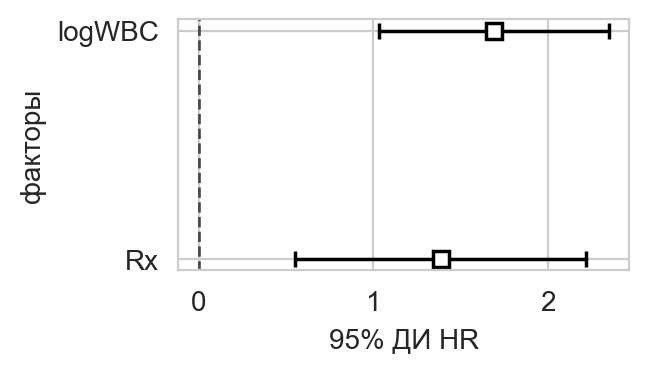

In [27]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(figsize = (8.5*cm,5*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
axs = cph2.plot()
axs.grid(True)
axs.set_ylim(-0.05,1.05)
axs.set_xlabel('95% ДИ HR')
axs.set_ylabel('факторы')

for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
                axs.get_xticklabels() + axs.get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show()  

Рассчитаем значимость улучшения качества модели после учета фактора logWBC с помощью теста отношения наибольшего правдоподобия:

In [28]:
print(
    f'Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model2) - 2log(model1), которое имеет распределение Хи2 с 1 степенью свободы:\n'
    f'Тестовая статистика LR: {abs(2*cph2.log_likelihood_ - 2*cph1.log_likelihood_):3.2f}\n'    
    f'p-value: {(1 - chi2.cdf(2*cph2.log_likelihood_ - 2*cph1.log_likelihood_, 1)):2.1e}\n'    
    )

Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model2) - 2log(model1), которое имеет распределение Хи2 с 1 степенью свободы:
Тестовая статистика LR: 30.36
p-value: 3.6e-08



Построим на одном графике скоректированные оценки функций выживания из модели Кокса при среднем logWBC=2.93 для обеих групп и оценки Каплана-Майера для обеих групп. Из графика видно, что соответствующие функции выживания существенно отличаются, что связано с разным средним logWBC (отличном от 2.93) в экспериментальных выборках. Такие графики позволяют оценить эффекты одного или нескольких факторов при зафиксированных другом (других) факторах.

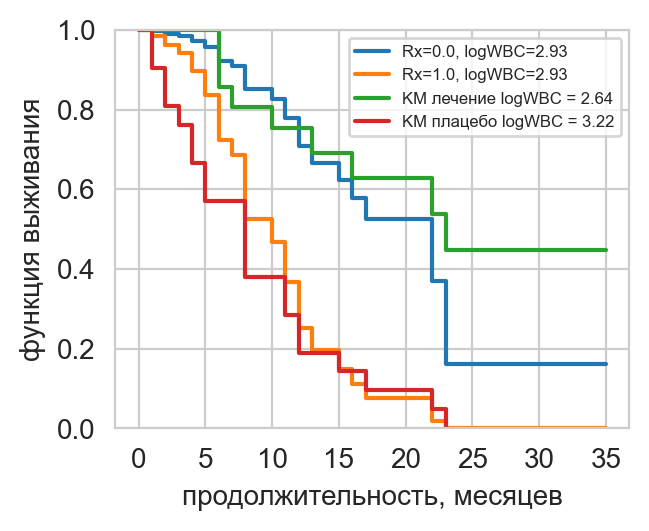

In [29]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(figsize = (8.5*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')

cph = CoxPHFitter()
kmf = KaplanMeierFitter()

cph.fit(data[['t','status','Rx','logWBC']], duration_col = 't', event_col = 'status')
cph.plot_partial_effects_on_outcome(covariates = ['Rx','logWBC'],
                                    values = [[0,2.93],[1,2.93]],
                                    plot_baseline=False,
                                    ax=axs)

kmf.fit(
        data.query('Rx==0')['t'], 
        data.query('Rx==0')['status'],
        alpha=0.05)
            
s = kmf.survival_function_.reset_index()
x = s.iloc[:,0].values
y = s.iloc[:,1].values
axs.step(x, y, where="post",label = f'KM лечение logWBC = {data.query("Rx==0")["logWBC"].mean():2.2f}')

kmf.fit(
        data.query('Rx==1')['t'], 
        data.query('Rx==1')['status'],
        alpha=0.05)
            
s = kmf.survival_function_.reset_index()
x = s.iloc[:,0].values
y = s.iloc[:,1].values
axs.step(x, y, where="post",label = f'KM плацебо logWBC = {data.query("Rx==1")["logWBC"].mean():2.2f}')

#x = np.array(cph.baseline_survival_.index)
#y2 = cph.baseline_survival_.iloc[:,0].values**np.exp(1.39*(1 - data['Rx'].mean()))
#y3 = cph.baseline_survival_.iloc[:,0].values**np.exp(1.39*(0 - data['Rx'].mean()))
#axs.step(x,y2,label='placebo',where='post',linewidth=1)
#axs.step(x,y3,label='treatment',where='post',linewidth=1)

axs.grid(True)
axs.set_ylim(0,1)
axs.set_xlabel('продолжительность, месяцев')
axs.set_ylabel('функция выживания')
axs.set_xticks(np.arange(0, 36, 5))
axs.legend(fontsize=6)

for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
                axs.get_xticklabels() + axs.get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show()  

Результаты анализа модели:

1. Согласно Z-тесту и тесту отношения правдоподобия факторы лечения и logWBC статистически значимы. Метрика c-index увеличилась, а AIC уменьшилась по сравнению с предыдущей моделью, таким образом качество модели стало лучше.
2. Модель можно представить аналитически в виде
 
    $h(t)$ = $h_0(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$ = $h_0(t)exp[1.39*Rx +1.69*logWBC]$
3. Для скорректированной по logWBС модели (т.е. при одном и том же значении logWBC) мы можем оценить влияние фактора лечения - относительная вероятность рецидива в 4 раза выше в группе плацебо. 

4. Интервальная оценка (95% ДИ) отношения интенсивности рисков также присутствует в результатах модели - [1.74 9.20]. Отметим, что интервал довольно широкий, но не содержит 1, что соответствует подтвержденной значимости фактора. Отметим, что интервальная оценка отношения рисков для Rx стала уже по сравнению с моделью 1.

5. Коэффициент Rx модели 1 лежит в 95% ДИ для коэффициента Rx модели 2 и наоборот, следовательно у нас нет статистически значимых оснований считать фактор logWBC конфаундером, но logWBC является значимым фактором влияющим на выживание.

### 4.3.3. <a id='toc4_3_3_'></a>[<font color='#42AAFF'>Факторы Rx, logWBC и их взаимодействие</font>](#toc0_)

In [30]:
data['Rx_logWBC'] = data['Rx']*data['logWBC']

In [31]:
cph3 = CoxPHFitter()
cph3.fit(data[['t','status','Rx','logWBC','Rx_logWBC']], duration_col = 't', event_col = 'status')
cph3.print_summary() 

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -69.65
         time fit was run = 2023-03-26 14:09:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Rx          2.37      10.75       1.71            -0.97             5.72                 0.38               304.16
logWBC      1.87       6.50       0.45             0.99             2.76                 2.69                15.75
Rx_logWBC  -0.32       0.73       0.53            -1.35             0.71                 0.26                 2.04

            cmp to     z      p   -log2(p)
covariate                                 
Rx            0.00  1.39   0.16       2.61
logWBC        0.00  4.15 <0.005      14.86
Rx_logWBC     0.00 -0.60   0.55       0.87
---
Concordance = 0.85
Partial AIC = 145.30
log-likelihood ratio test = 47.07 on 3 df
-log2(p) of ll-ratio test = 31.47

Рассмотрим результаты 3 модели:
1. Данная модель учитывает logWBC в виде отдельного фактора и в виде модификатора Rx или иначе говоря учитывает взаимодейтсвие факторов Rx и logWBC.
2. P-value для признака, учитывающего взаимодействие, равно 0.55, что указывает на то, что статистически значимого взамодействия факторов нет. Кроме того остальные метрики также не улучшились по сравнению с моделью 2.

## 4.4. <a id='toc4_4_'></a>[<font color='#42AAFF'>Выводы</font>](#toc0_)

1. Проверили условие применимости модели Кокса для всех имеющихся признаков несколькими методами: сравнением лог-лог функций выживания, сравнением наблюдаемых и ожидаемых функций выживания, критерием согласия. Все методы показали, что условие пропорциональности рисков нарушено для признака пол, влияние которого будет рассмотрено в следующем разделе.
2. Статистически наиболее значимой моделью оказалась модель Кокса, учитывающая факторы лечения и logWBC и не учитывающая их взаимодействия:

    $h(t)$ = $h_0(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$ = $h_0(t)exp[1.39*Rx +1.69*logWBC]$
3. Для скорректированной по logWBС модели (т.е. при одном и том же значении logWBC) мы можем оценить влияние фактора лечения - интенсивность риска рецидива в 4 раза выше в группе плацебо. 
4. 95% интервальная оценка отношения интенсивностей риска рецидива в группах плацебо и лечения [1.74 9.20].
5. Нет оснований считать фактор logWBC конфаундером.

# 5. <a id='toc5_'></a>[<font color='#42AAFF'>Стратифицированная модель Кокса</font>](#toc0_)

## 5.1. <a id='toc5_1_'></a>[<font color='#42AAFF'>Краткая теоретическая справка</font>](#toc0_)

В предыдущем разделе выяснили, что фактор пол не удовлетворяет условию применимости модели Кокса - условию пропорциональности рисков. В этом случае для учета этого фактора применяется стратифицированная модель Кокса, в рамках которой предполагается, что базовая функция интенсивности риска может быть разной для разных значений пола. При этом коэффициенты регрессии могут быть как одинаковыми для всех страт (модель без учета взаимодействия), так и разными (модель с учетом взаимодействия):

1. Модель без учета взаимодействия:

    $h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$, где

    $g=1$ (женский, $sex=0$),\
    $g=2$ (мужской, $sex=1$)

2. Модель с учетом взаимодействия может быть представлена в 2х эквивалентных формах:

    $h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_{1g}*Rx+\beta{}_{2g}*logWBC]$  

    или
    
    $h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_{1}*Rx+\beta{}_{2}*logWBC+\beta{}_{3}*sex*Rx+\beta{}_{4}*sex*logWBC]$

    Данные представления верны при определенных соотношениях между коэффициентами. Для рассматриваемого случая можно показать, что: 

    при g=1 sex=1:

    $\beta{}_{11}$ = $\beta{}_{1} + \beta{}_{3}$

    $\beta{}_{21}$ = $\beta{}_{2} + \beta{}_{4}$

    при g=2 sex=0:

    $\beta{}_{12}$ = $\beta{}_{1}$

    $\beta{}_{22}$ = $\beta{}_{2}$

    

## 5.2. <a id='toc5_2_'></a>[<font color='#42AAFF'>Модель без учета взаимодействия</font>](#toc0_)

Модель без учета взаимодействия:

$h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$

In [32]:
cph4 = CoxPHFitter()
cph4.fit(data[['t','status','Rx','logWBC','sex']], duration_col = 't', event_col = 'status', strata='sex')
cph4.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
                   strata = sex
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -55.73
         time fit was run = 2023-03-26 14:09:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Rx          1.00       2.71       0.47             0.07             1.93                 1.07                 6.86
logWBC      1.45       4.28       0.34             0.78             2.13                 2.18                 8.40

            cmp to    z      p   -log2(p)
covariate                                
Rx            0.00 2.11   0.04       4.83
logWBC        0.00 4.22 <0.005      15.35
---
Concordance = 0.81
Partial AIC = 115.47
log-likelihood ratio test = 32.06 on 2 df
-log2(p) of ll-ratio test = 23.13

Выполним тестирвание значимости фактора лечения методом наибольшего правдоподобия при сравнении модели с Rx и без:

In [33]:
cph5 = CoxPHFitter()
cph5.fit(data[['t','status','logWBC','sex']], duration_col = 't', event_col = 'status', strata='sex')
cph5.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
                   strata = sex
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -58.14
         time fit was run = 2023-03-26 14:09:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
logWBC      1.51       4.54       0.32             0.88             2.15                 2.40                 8.59

            cmp to    z      p   -log2(p)
covariate                                
logWBC        0.00 4.66 <0.005      18.26
---
Concordance = 0.79
Partial AIC = 118.28
log-likelihood ratio test = 27.25 on 1 df
-log2(p) of ll-ratio test = 22.42

In [34]:
print(
    f'Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model4) - 2log(model5), которое имеет распределение Хи2 с 1 степенью свободы:\n'
    f'Тестовая статистика LR: {abs(2*cph4.log_likelihood_ - 2*cph5.log_likelihood_):3.2f}\n'    
    f'p-value: {(1 - chi2.cdf(2*cph4.log_likelihood_ - 2*cph5.log_likelihood_, 1)):2.1e}\n'    
    )

Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model4) - 2log(model5), которое имеет распределение Хи2 с 1 степенью свободы:
Тестовая статистика LR: 4.81
p-value: 2.8e-02



Согласно результатам модели:

1. Эффект от лечения (HR Rx) существенно снизился по сравнению с наилучшей нестратифицированной моделью - стал 2.71 против 4.00. Отметим, что влияние любого фактора одно и тоже
2. Значимость фактора Rx в модели существенно снизилась согласно Z-тесту, фактор едва считается значимым (p-value=0.04) при принятом уровне значимости 0.05. Тем не менее значимость фактора подтверждается и тестом отношения максимального правдоподобия.
3. HR факторов одинаков для всех значений стратифицированной переменной.
4. Для стратифицированной переменной нельзя определить отошения интенсивностей рисков при других фиксированных факторах.


## 5.3. <a id='toc5_3_'></a>[<font color='#42AAFF'>Модель с учетом взаимодействия</font>](#toc0_)

Обучим модели Кокса без учета взаимодействия для женщин (sex=1) и мужчин (sex=0) отдельно и сравним регрессионные коэффициенты:

In [35]:
cph6 = CoxPHFitter()
cph6.fit(data.query('sex==1')[['t','status','logWBC','Rx']], duration_col = 't', event_col = 'status')
cph6.print_summary()

<lifelines.CoxPHFitter: fitted with 20 total observations, 6 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 20
number of events observed = 14
   partial log-likelihood = -20.76
         time fit was run = 2023-03-26 14:09:26 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
logWBC      1.74       5.71       0.54             0.69             2.79                 2.00                16.33
Rx          1.98       7.23       0.74             0.53             3.43                 1.70                30.77

            cmp to    z      p   -log2(p)
covariate                                
logWBC        0.00 3.25 <0.005       9.77
Rx            0.00 2.68   0.01       7.07
---
Concordance = 0.90
Partial AIC = 45.52
log-likelihood ratio test = 29.18 on 2 df
-log2(p) of ll-ratio test = 21.05

In [36]:
cph7 = CoxPHFitter()
cph7.fit(data.query('sex==0')[['t','status','logWBC','Rx']], duration_col = 't', event_col = 'status')
cph7.print_summary()

<lifelines.CoxPHFitter: fitted with 22 total observations, 6 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 22
number of events observed = 16
   partial log-likelihood = -33.09
         time fit was run = 2023-03-26 14:09:26 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
logWBC      1.21       3.34       0.50             0.22             2.19                 1.25                 8.96
Rx          0.31       1.37       0.56            -0.79             1.42                 0.45                 4.12

            cmp to    z    p   -log2(p)
covariate                              
logWBC        0.00 2.40 0.02       5.91
Rx            0.00 0.55 0.58       0.78
---
Concordance = 0.69
Partial AIC = 70.18
log-likelihood ratio test = 6.65 on 2 df
-log2(p) of ll-ratio test = 4.79

Регрессионные коэффициенты моделей для мужчин и женщин отличаются значительно, что дает основания предполагать, что взаимодействие факторов значимое.

Модель с учетом взаимодействия:
   
$h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_{1}*Rx+\beta{}_{2}*logWBC+\beta{}_{3}*sex*Rx+\beta{}_{4}*sex*logWBC]$

Добавим признаки, учитывающее взаимодействие:

In [37]:
data['sex_logWBC'] = data['sex'] * data['logWBC']
data['sex_Rx'] = data['sex'] * data['Rx']

Обучим модель Кокса с учетом взаимодействия:

In [38]:
cph8 = CoxPHFitter()
cph8.fit(data[['t','status','Rx','logWBC','sex','sex_logWBC','sex_Rx']], duration_col = 't', event_col = 'status', strata='sex')
cph8.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
                   strata = sex
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -53.85
         time fit was run = 2023-03-26 14:09:26 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
Rx           0.31       1.37       0.56            -0.79             1.42                 0.45                 4.12
logWBC       1.21       3.34       0.50             0.22             2.19                 1.25                 8.96
sex_logWBC   0.54       1.71       0.74            -0.90             1.98                 0.40                 7.22
sex_Rx       1.67       5.29       0.93            -0.16             3.49                 0.86                32.73

             cmp to    z    p   -log2(p)
covariate                               
Rx             0.00 0.55 0.58       0.78
logWBC         0.00 2.40 0.02       5.91
sex_logWBC     0.00 0.73 0.47       1.10
sex_Rx         0.00 1.79 0.07       3.78
---
Concordance = 0.80
Partial AIC = 115.70
log-likelihood ratio test = 35.83 on 4 df
-log2(p) of ll-ratio test = 21.60

Из вывода модели видно, что согласно Z-тесту при уровне значимости 0.05 все факторы незначимы кроме logWBC. Проверим значимость факторов взаимодействия с помощью критерия отношения правдоподобия сравнивая с моделью без учета взаимодействия:

In [39]:
print(
    f'Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model4) - 2log(model5), которое имеет распределение Хи2 с 2 степенями свободы:\n'
    f'Тестовая статистика LR: {abs(2*cph8.log_likelihood_ - 2*cph4.log_likelihood_):3.2f}\n'    
    f'p-value: {(1 - chi2.cdf(2*cph8.log_likelihood_ - 2*cph4.log_likelihood_, 2)):2.1e}\n'    
    )

Расчёт p-value отношения максимального правдоподобия, статистика которого LR = 2log(model4) - 2log(model5), которое имеет распределение Хи2 с 2 степенями свободы:
Тестовая статистика LR: 3.77
p-value: 1.5e-01



Таким образом, оснований применять модель с учетом взаимодействия нет.

## 5.4. <a id='toc5_4_'></a>[<font color='#42AAFF'>Иллюстрация основополагающих приближений моделей</font>](#toc0_)

Рассмотрим лог-лог графики ожидаемых функций выживания Кокс моделей с учетом и без учета взаимодействия для нестратифицированных моделей. Каждая модель содержит 2 признака: пол и лечение:

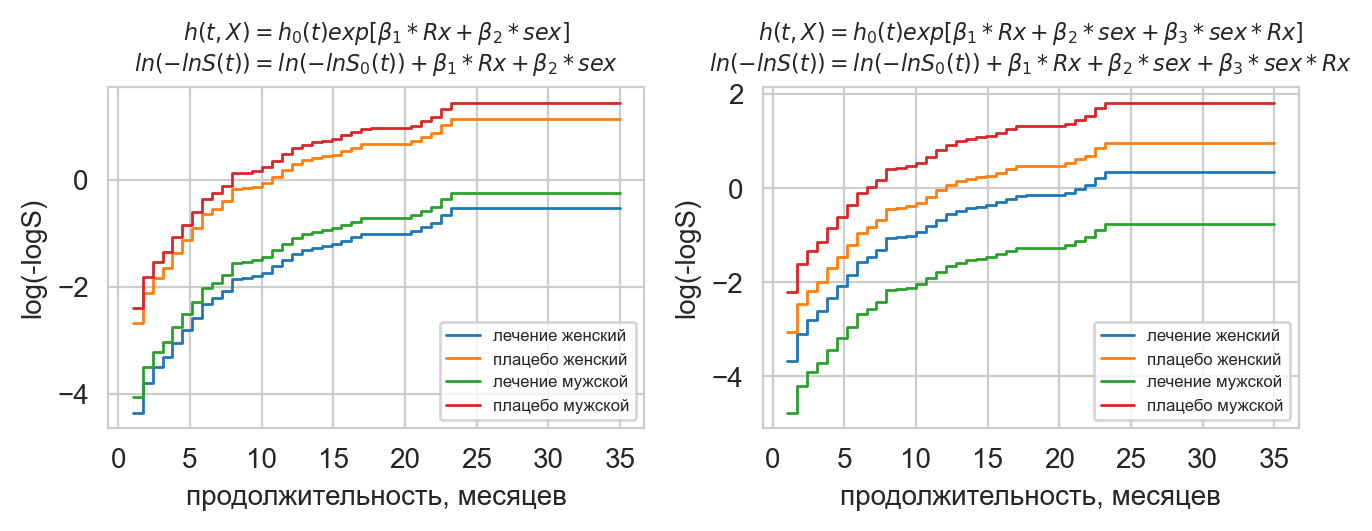

In [40]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols = 2, figsize = (8.5*2*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
title = ['$h(t,X) = h_{0}(t)exp[\\beta{}_1*Rx+\\beta{}_2*sex]$\n$ln(-lnS(t))=ln(-lnS_0(t))+\\beta{}_1*Rx+\\beta{}_2*sex$',
         '$h(t,X) = h_{0}(t)exp[\\beta{}_1*Rx+\\beta{}_2*sex+\\beta{}_3*sex*Rx]$\n$ln(-lnS(t))=ln(-lnS_0(t))+\\beta{}_1*Rx+\\beta{}_2*sex+\\beta{}_3*sex*Rx$']


cph = CoxPHFitter()

cph.fit(
    data[['t','status','Rx','sex']], 
    duration_col = 't', 
    event_col = 'status')

x = np.linspace(1,35,50)
y1 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':0}),x)))
y2 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':0}),x)))
y3 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':1}),x)))
y4 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':1}),x)))

axs[0].step(x,y1,label='лечение женский',where='post',linewidth=1)
axs[0].step(x,y2,label='плацебо женский',where='post',linewidth=1)
axs[0].step(x,y3,label='лечение мужской',where='post',linewidth=1)
axs[0].step(x,y4,label='плацебо мужской',where='post',linewidth=1)

cph.fit(
    data[['t','status','Rx','sex','sex_Rx']], 
    duration_col = 't', 
    event_col = 'status')

y1 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':0,'sex_Rx':0}),x)))
y2 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':0,'sex_Rx':0}),x)))
y3 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':1,'sex_Rx':0}),x)))
y4 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':1,'sex_Rx':1}),x)))

axs[1].step(x,y1,label='лечение женский',where='post',linewidth=1)
axs[1].step(x,y2,label='плацебо женский',where='post',linewidth=1)
axs[1].step(x,y3,label='лечение мужской',where='post',linewidth=1)
axs[1].step(x,y4,label='плацебо мужской',where='post',linewidth=1)

for j in range(0,2):    
    axs[j].grid(True)
    axs[j].set_xlabel('продолжительность, месяцев')
    axs[j].set_ylabel('log(-logS)')
    axs[j].set_title(title[j])   
    axs[j].title.set_fontsize(8) 
    axs[j].set_xticks(np.arange(0, 36, 5))
    axs[j].legend(fontsize=6)

    for item in ([axs[j].xaxis.label, axs[j].yaxis.label] +
                axs[j].get_xticklabels() + axs[j].get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show() 

По визуализации мы наблюдаем следующие особенности:

1. Предполагается, что для Rx и sex выполняется условия пропорциональности рисков, поэтому все кривые параллельны.
2. В модели без учета взаимодействия эффект лечения одинаков и для женщин, и для мужчин - расстояния между графиками одинаковы.
3. В модели с учетом взаимодействия эффект лечения разный для женщин и мужчин, более сильный для мужчин - расстояние между графиками больше.

Рассмотрим лог-лог графики ожидаемых функций выживания Кокс моделей с учетом и без учета взаимодействия для стратифицированных моделей. Каждая модель содержит 2 признака: пол и лечение:

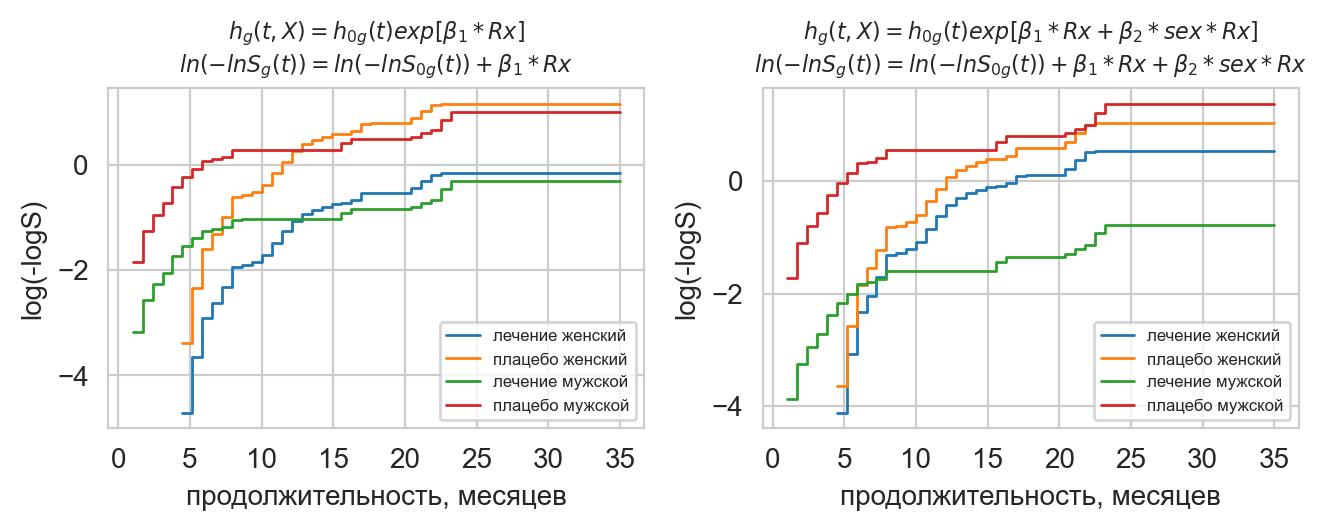

In [41]:
cm = 1/2.54
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols = 2, figsize = (8.5*2*cm,7*cm),dpi = 200)
cmap = plt.cm.get_cmap('tab10')
title = ['$h_g(t,X) = h_{0g}(t)exp[\\beta{}_1*Rx]$\n$ln(-lnS_g(t))=ln(-lnS_{0g}(t))+\\beta{}_1*Rx$',
         '$h_g(t,X) = h_{0g}(t)exp[\\beta{}_1*Rx+\\beta{}_2*sex*Rx]$\n$ln(-lnS_g(t))=ln(-lnS_{0g}(t))+\\beta{}_1*Rx+\\beta{}_2*sex*Rx$']


cph = CoxPHFitter()

cph.fit(
    data[['t','status','Rx','sex']], 
    duration_col = 't', 
    event_col = 'status',
    strata='sex')

x = np.linspace(1,35,50)
y1 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':0}),x)))
y2 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':0}),x)))
y3 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':1}),x)))
y4 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':1}),x)))

axs[0].step(x,y1,label='лечение женский',where='post',linewidth=1)
axs[0].step(x,y2,label='плацебо женский',where='post',linewidth=1)
axs[0].step(x,y3,label='лечение мужской',where='post',linewidth=1)
axs[0].step(x,y4,label='плацебо мужской',where='post',linewidth=1)

cph.fit(
    data[['t','status','Rx','sex','sex_Rx']], 
    duration_col = 't', 
    event_col = 'status',
    strata='sex')

y1 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':0,'sex_Rx':0}),x)))
y2 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':0,'sex_Rx':0}),x)))
y3 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[0],'sex':1,'sex_Rx':0}),x)))
y4 = np.log(-np.log(cph.predict_survival_function(pd.DataFrame({'Rx':[1],'sex':1,'sex_Rx':1}),x)))

axs[1].step(x,y1,label='лечение женский',where='post',linewidth=1)
axs[1].step(x,y2,label='плацебо женский',where='post',linewidth=1)
axs[1].step(x,y3,label='лечение мужской',where='post',linewidth=1)
axs[1].step(x,y4,label='плацебо мужской',where='post',linewidth=1)

for j in range(0,2):    
    axs[j].grid(True)
    axs[j].set_xlabel('продолжительность, месяцев')
    axs[j].set_ylabel('log(-logS)')
    axs[j].set_title(title[j])   
    axs[j].title.set_fontsize(8) 
    axs[j].set_xticks(np.arange(0, 36, 5))
    axs[j].legend(fontsize=6)

    for item in ([axs[j].xaxis.label, axs[j].yaxis.label] +
                axs[j].get_xticklabels() + axs[j].get_yticklabels()):    
        item.set_font('Arial')
        item.set_fontsize(10)
fig.tight_layout()
plt.show() 

По визуализации мы наблюдаем следующие особенности:

1. Для стратифицированной модели для sex не выполняется условие пропорциональности рисков, поэтому эти кривые непараллельны, но параллельны для Rx в каждой из страт по полу.
2. В модели без учета взаимодействия эффект лечения одинаков и для женщин, и для мужчин - расстояния между графиками одинаковы.
3. В модели с учетом взаимодействия графики непараллельны несмотря на то, что для Rx предположение о пропорциональности выполяется. Эффект лечения разный для женщин и мужчин, более сильный для мужчин - расстояние между графиками больше.

## 5.5. <a id='toc5_5_'></a>[<font color='#42AAFF'>Выводы</font>](#toc0_)

1. В предыдущем разделе была получена модель Кокса, которая учитывала влияние факторов лечения и logWBC: 

    $h(t)$ = $h_0(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$ = $h_0(t)exp[1.39*Rx +1.69*logWBC]$

    Но эта модель не учитывала фактор пола, который не удовлятворяет предположению о пропорциональности рисков. Для его учета применили 2 стратифицированных модели Кокса: без учета взаимодействия и с учетом взаимодействия.

2. Стратифицированная по полу модель без учета взаимодействия $h_g(t,X)$ = $h_{0g}(t)exp[1.0*Rx+1.45*logWBC]$ оказалась статистически значимой, что было подтвержденно Z-тестами и тестом отношения максимального правдоподобия. При этом влияние фактора лечения снизилось по сравнению с нестратифицированной моделью - HR = 2.71 против HR = 4.00. 95% доверительный интервал - [1.07 6.86].

3. Тест отношения наибольшего правдоподобия модель с учетом взаимодействия $h_g(t,X)$ = $h_{0g}(t)exp[\beta{}_{1}*Rx+\beta{}_{2}*logWBC+\beta{}_{3}*sex*Rx+\beta{}_{4}*sex*logWBC]$ и модели без учета взаимодействия не плзволили отвергуть нулевую гипотезу о том, что взаимодействия факторов нет. Таким образом, стратифицированная по полу модель Кокса с учетом влияния фактора лечения и logWBC, без учета взаимодействия наиболее точно учитывает влияния на продолжительность жизни.

# 6. <a id='toc6_'></a>[<font color='#42AAFF'>Выводы</font>](#toc0_)

1. С помощью инструментов описательной статистики анализа выживаемости удалось выявить основные предполагаемые закономерности:

    1. Выживаемость в группе лечения выше, чем в группе плацебо.
    2. Чем ниже содержание белых кровяных телец logWBC, тем выше выживаемость.
    3. Фактор logWBC может быть конфаундером.
    4. Влияние пола неоднозначно, на ранних этапах больше шансов вылечиться у женщин, а на поздних у мужчин.

2. Тестирование гипотез

    1. Протестировали влияние фактора лечения на функцию выживания с помощью логрангового теста - влияние значимое при уровне значимости 0.05. 
    2. Более сложным тестированием с учетом влияния остальных факторов не занимались, исследуем этот вопрос при анализе моделей Кокса.


3. Исследование влияние факторов с помощью простейших моделей Кокса: 

    1. Проверили условие применимости модели Кокса для всех имеющихся признаков несколькими методами: сравнением лог-лог функций выживания, сравнением наблюдаемых и ожидаемых функций выживания, критерием согласия. Все методы показали, что условие пропорциональности рисков нарушено для признака пол, влияние которого будет рассмотрено в следующем разделе.
    2. Статистически наиболее значимой моделью оказалась модель Кокса, учитывающая факторы лечения и logWBC и не учитывающая их взаимодействия:

        $h(t)$ = $h_0(t)exp[\beta{}_1*Rx+\beta{}_2*logWBC]$ = $h_0(t)exp[1.39*Rx +1.69*logWBC]$
    3. Для скорректированной по logWBС модели (т.е. при одном и том же значении logWBC) мы можем оценить влияние фактора лечения - интенсивность риска рецидива в 4 раза выше в группе плацебо. 
    4. 95% интервальная оценка отношения интенсивностей риска рецидива в группах плацебо и лечения [1.74 9.20].
    5. Нет оснований считать фактор logWBC конфаундером.

4. Стратифицированная модель Кокса:

    1. Простейшие модели Кокса не рассматривали влияния пола пациента, так как этот фактор не удовлетворяет условию пропориональности рисков. Для его учета исследованы 2 стратифицированные модели: без учета и с учетом взаимодействия факторов.
    2. Стратифицированная по полу модель без учета взаимодействия $h_g(t,X)$ = $h_{0g}(t)exp[1.0*Rx+1.45*logWBC]$ оказалась статистически значимой, что было подтвержденно Z-тестами и тестом отношения максимального правдоподобия. При этом влияние фактора лечения снизилось по сравнению с нестратифицированной моделью - HR = 2.71 против HR = 4.00. 95% доверительный интервал - [1.07 6.86].
    3. Тест отношения наибольшего правдоподобия модель с учетом взаимодействия и модели без учета взаимодействия не плзволили отвергуть нулевую гипотезу о том, что взаимодействия факторов нет. Таким образом, стратифицированная по полу модель Кокса с учетом влияния фактора лечения и logWBC, без учета взаимодействия наиболее точно учитывает влияния на продолжительность жизни.